## Real Estate - Price Predictor

In [124]:
import pandas as pd

In [125]:
housing = pd.read_csv("data.csv")

In [126]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [127]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [128]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [129]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [130]:
%matplotlib inline

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

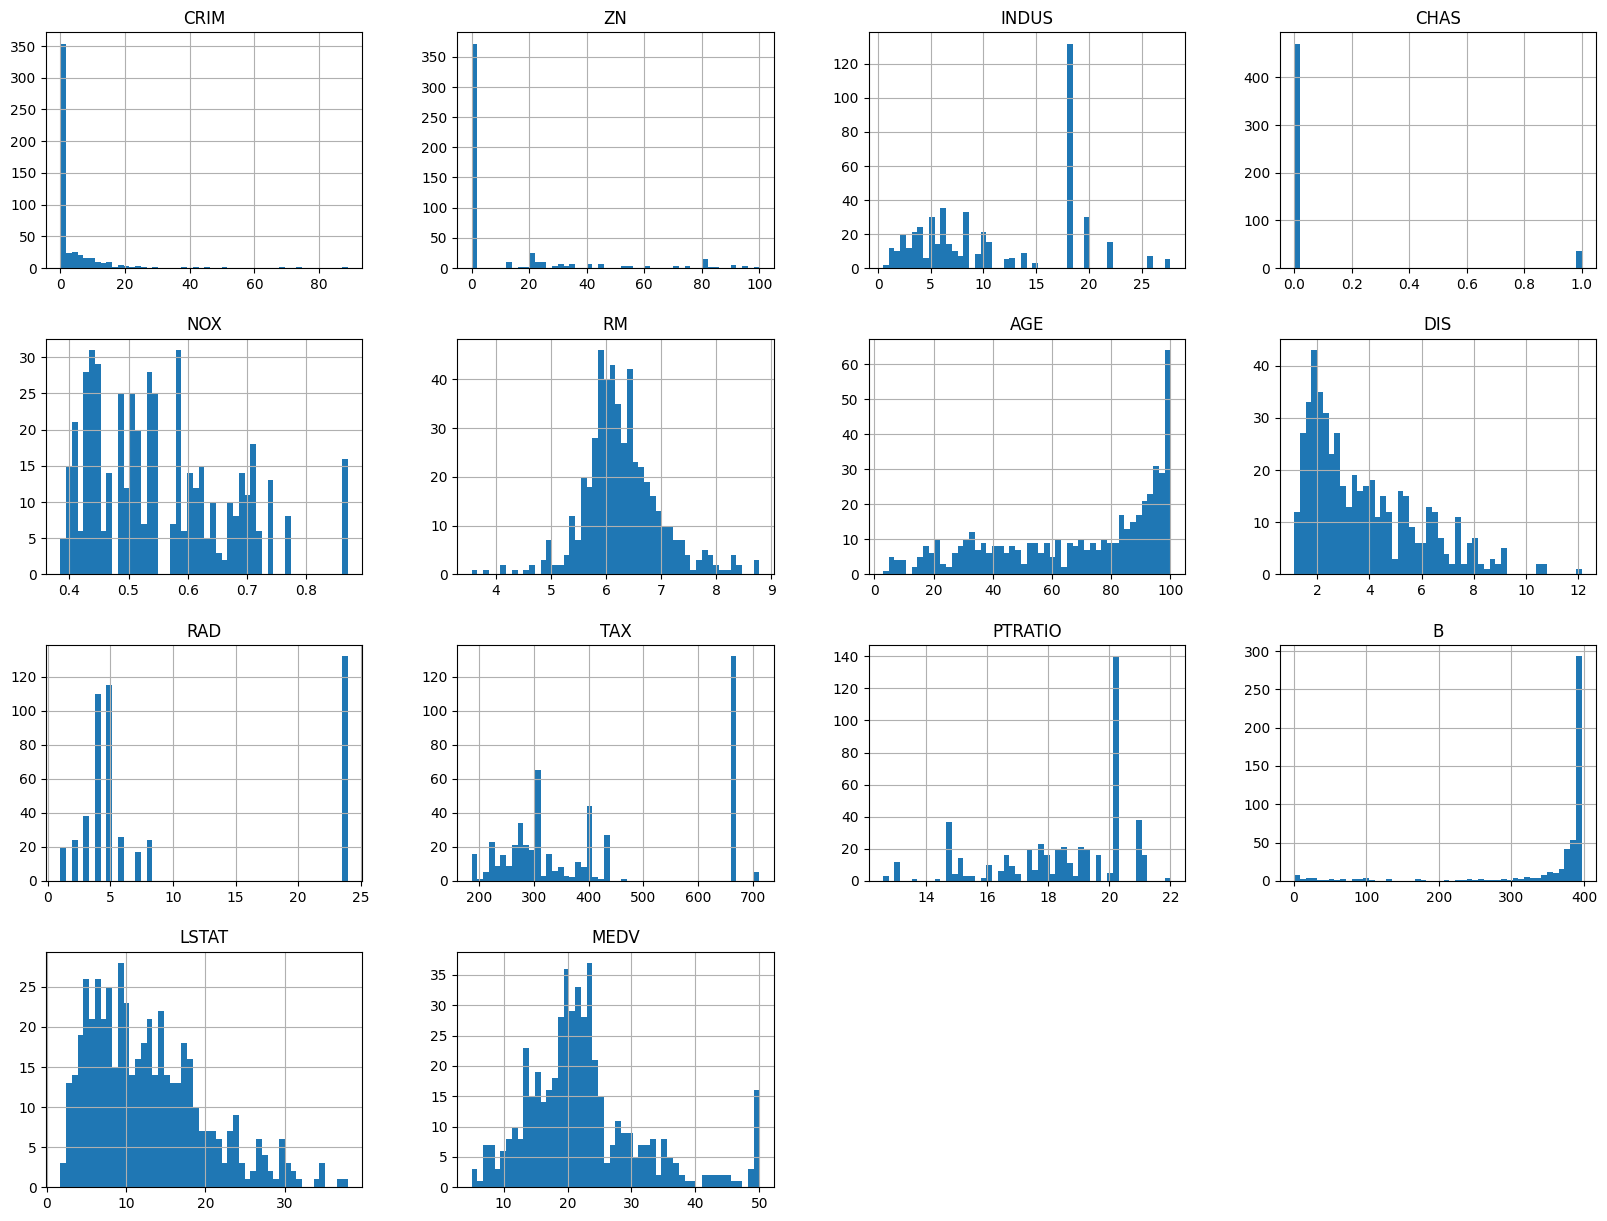

In [131]:
# # For plotting histogram
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))

In [132]:
# For Visualizing Normalized Dataset
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [133]:
numeric_columns = housing.select_dtypes(include=['float64', 'int64'])


In [134]:
# Normalize the data
normalized_data = (numeric_columns - numeric_columns.mean()) / numeric_columns.std()


In [135]:
# Melt the DataFrame to long format for boxplot
melted_data = pd.melt(normalized_data)


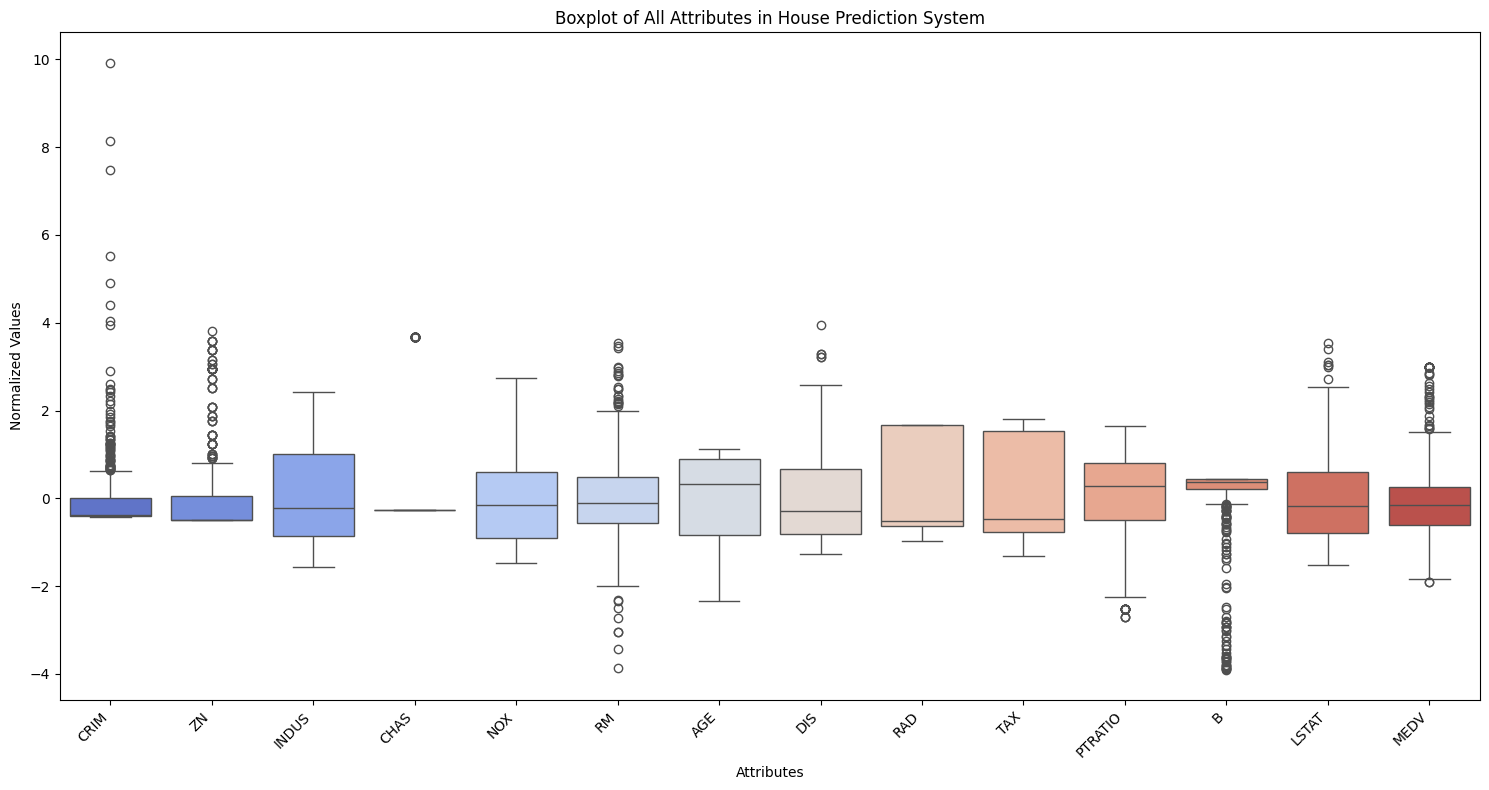

In [136]:
# Plot boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(x='variable', y='value', hue='variable', data=melted_data, palette='coolwarm', legend=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Attributes')
plt.ylabel('Normalized Values')
plt.title('Boxplot of All Attributes in House Prediction System')
plt.tight_layout()
plt.show()



## Train-Test Splitting

In [137]:
# For learning purpose
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:] 
    return data.iloc[train_indices], data.iloc[test_indices]

In [138]:
# train_set, test_set = split_train_test(housing, 0.2)

In [139]:
# print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

In [140]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 102



In [141]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [142]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [143]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [144]:
# 95/7

In [145]:
# 376/28

In [146]:
housing = strat_train_set.copy()

## Looking for Correlations

In [147]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [149]:
# Correlation data
correlation_data = {
    'MEDV': [1.000000],
    'RM': [0.680857],
    'B': [0.361761],
    'ZN': [0.339741],
    'DIS': [0.240451],
    'CHAS': [0.205066],
    'AGE': [-0.364596],
    'RAD': [-0.374693],
    'CRIM': [-0.393715],
    'NOX': [-0.422873],
    'TAX': [-0.456657],
    'INDUS': [-0.473516],
    'PTRATIO': [-0.493534],
    'LSTAT': [-0.740494]
}

In [150]:
# Create a DataFrame from correlation data
df = pd.DataFrame(correlation_data)

Correlation HeatMap

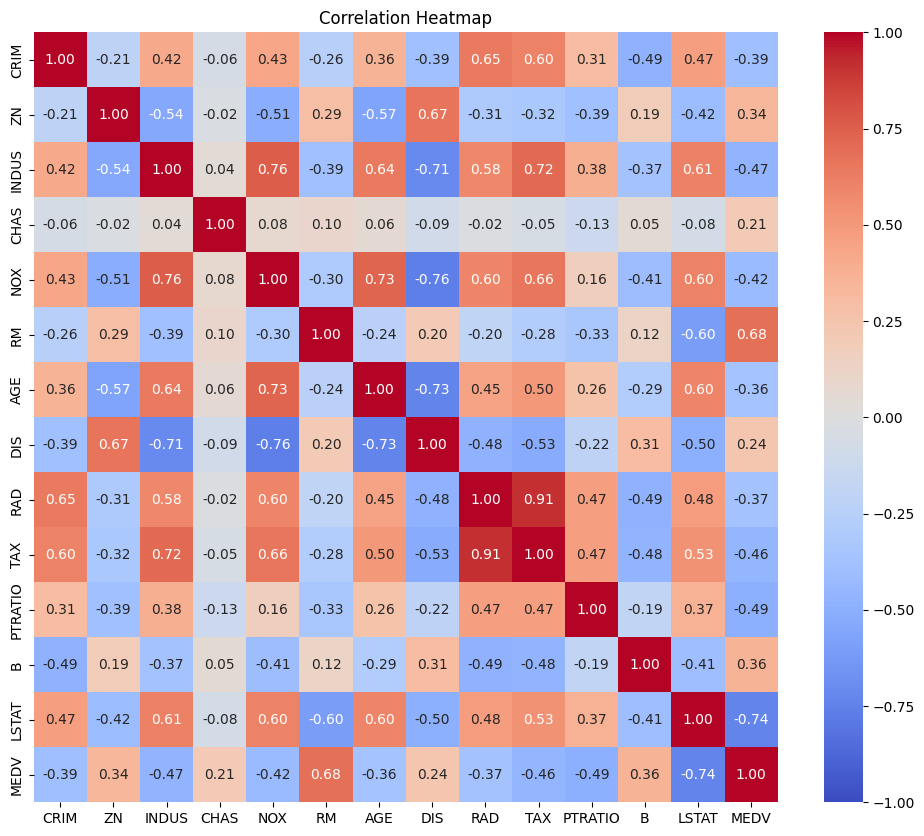

In [151]:
# Visualize the correlation matrix
corr_matrix = housing.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

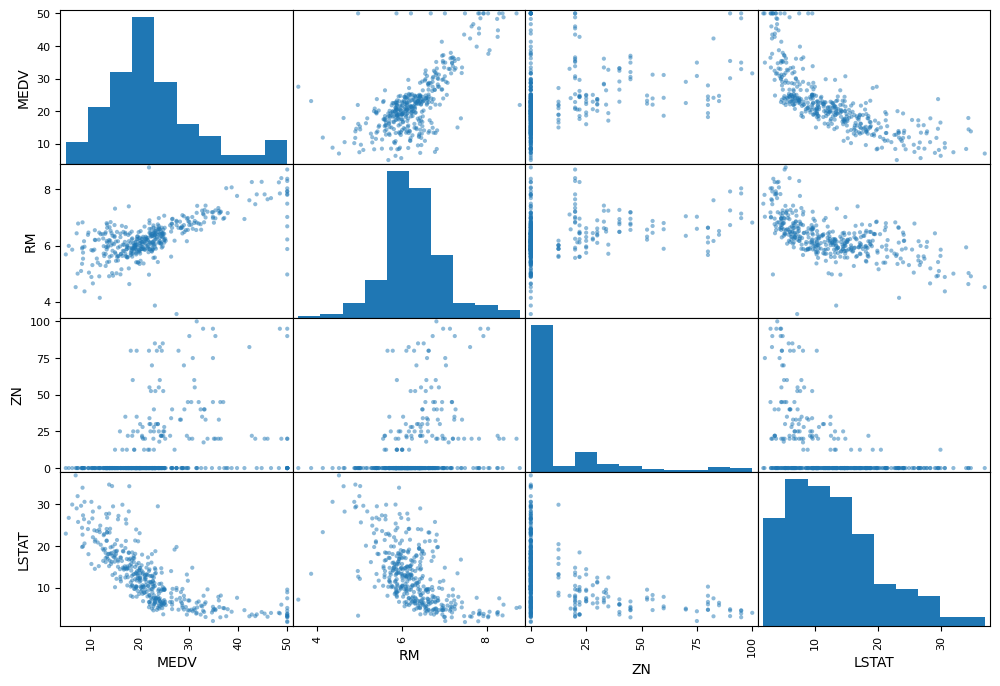

In [152]:
 from pandas.plotting import scatter_matrix
 attributes = ["MEDV", "RM", "ZN", "LSTAT"]
 scatter_matrix(housing[attributes], figsize = (12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

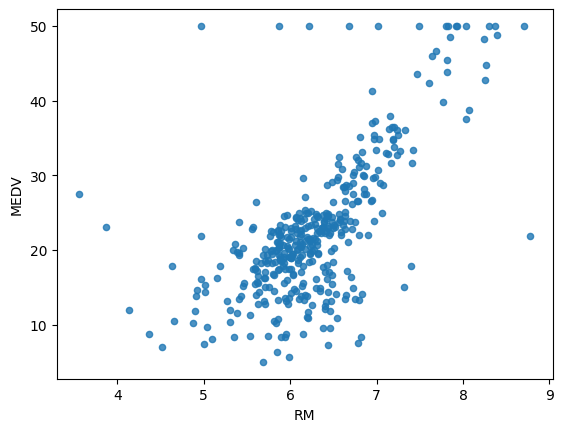

In [153]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

## Trying out Attribute combinations


In [154]:
housing["TAXRM"] = housing['TAX']/housing['RM']

In [155]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [156]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.528626
LSTAT     -0.740494
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

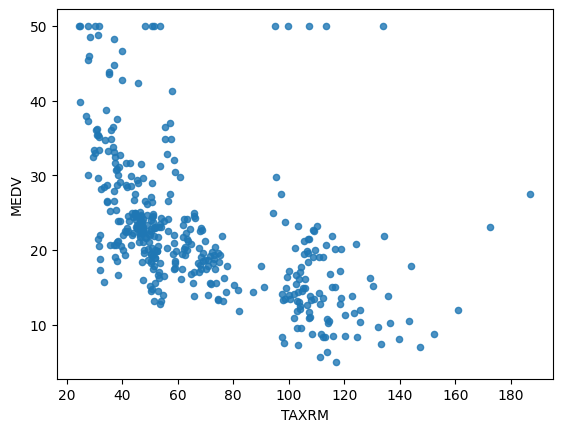

In [157]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [158]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attributes

In [159]:
# To take care of missing attributes, you have three options:
#     1. Get rid of the missing data points
#     2. Get rid of the whole attribute
#     3. Set the value to some value(0, mean or median)

In [160]:
a = housing.dropna(subset=["RM"]) #Option 1
a.shape
# Note that the original housing dataframe will remain unchanged

(399, 13)

In [161]:
housing.drop("RM", axis=1).shape # Option 2
# Note that there is no RM column and also note that the original housing dataframe will remain unchanged

(404, 12)

In [162]:
median = housing["RM"].median() # Compute median for Option 3

In [163]:
housing["RM"].fillna(median) # Option 3
# Note that the original housing dataframe will remain unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [164]:
housing.shape

(404, 13)

In [165]:
housing.describe() # before we started filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279481,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716784,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.876500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [166]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [167]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [168]:
X = imputer.transform(housing)

In [169]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [170]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

Primarily, three types of objects
1. Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters

2. Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

## Feature Scaling

Primarily, two types of feature scaling methods:
1. Min-max scaling (Normalization)
    (value - min)/(max - min)
    Sklearn provides a class called MinMaxScaler for this
    
2. Standardization
    (value - mean)/std
    Sklearn provides a class called StandardScaler for this


## Creating a Pipeline

In [171]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])


In [172]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [173]:
housing_num_tr.shape

(404, 13)

## Selecting a desired model for  Real Estates

In [174]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Define the models
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('SVR', SVR()),
    ('Gradient Boosting', GradientBoostingRegressor())
]


In [175]:
from sklearn.metrics import mean_squared_error

# Initialize lists to store accuracy metrics
rmse_scores = []

# Perform cross-validation and calculate RMSE for each model
for name, model in models:
    scores = cross_val_score(model, housing_num_tr, housing_labels, scoring='neg_mean_squared_error', cv=10)
    rmse = np.sqrt(-scores.mean())
    rmse_scores.append(rmse)
    print(f'{name}: Mean RMSE: {rmse}, Standard Deviation: {scores.std()}')



Linear Regression: Mean RMSE: 5.147683188192044, Standard Deviation: 11.865138002760451
Decision Tree: Mean RMSE: 4.533670778928188, Standard Deviation: 9.138709797491122


Random Forest: Mean RMSE: 3.3345431897166007, Standard Deviation: 3.8923846199004513
SVR: Mean RMSE: 5.869375222261927, Standard Deviation: 21.510372102257936
Gradient Boosting: Mean RMSE: 3.1749147566425013, Standard Deviation: 4.867282159980043


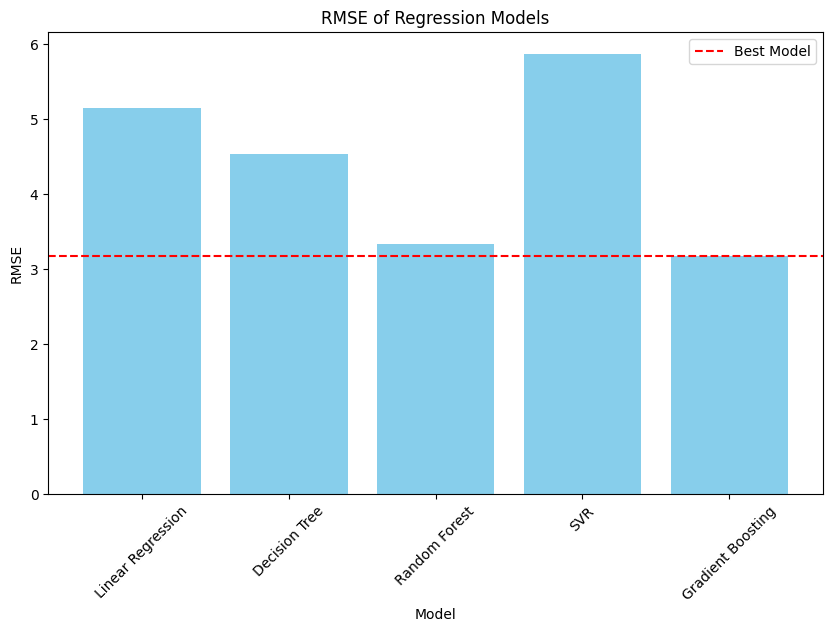

In [176]:
# Plotting RMSE for all models
plt.figure(figsize=(10, 6))
plt.bar(names, rmse_scores, color='skyblue')
plt.axhline(min(rmse_scores), color='red', linestyle='--', label='Best Model')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE of Regression Models')
plt.xticks(rotation=45)
plt.legend()
plt.show()


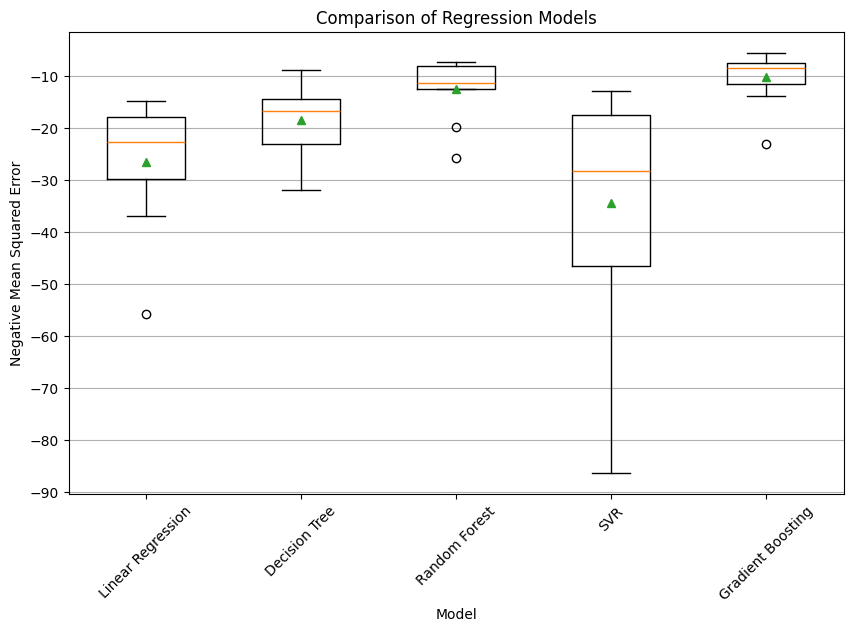

In [177]:
# Plotting
plt.figure(figsize=(10, 6))
plt.boxplot(results, labels=names, showmeans=True)
plt.title('Comparison of Regression Models')
plt.xlabel('Model')
plt.ylabel('Negative Mean Squared Error')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [178]:
# Find the model with the lowest mean RMSE
best_model_idx = np.argmax([np.mean(scores) for scores in results])
best_model_name = names[best_model_idx]
best_model = models[best_model_idx][1]

# Train the best model on the entire training dataset
best_model.fit(housing_num_tr, housing_labels)

# Make predictions on new data
some_data = housing.iloc[:5]
prepared_data = my_pipeline.transform(some_data)
predictions = best_model.predict(prepared_data)

# Compare predictions with actual labels
some_labels = housing_labels.iloc[:5]
print("Predictions:", predictions)
print("Actual Labels:", list(some_labels))


Predictions: [22.27587227 25.3910372  17.30053005 23.45644865 23.91807876]
Actual Labels: [21.9, 24.5, 16.7, 23.1, 23.0]


## Evaluating the model

In [179]:
# Evaluate the RMSE on the entire training dataset
housing_predictions = best_model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)
print("RMSE on Training Data:", rmse)


RMSE on Training Data: 1.3649096690786684


## Using better evaluation technique - Cross Validation

In [180]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform cross-validation using negative mean squared error as the scoring metric
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)

# Calculate RMSE scores
rmse_scores = np.sqrt(-scores)

# Define a function to print scores
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

# Print the RMSE scores
print_scores(rmse_scores)


Scores: [2.97144614 2.7900917  4.78745894 2.26870318 2.9622733  2.69744738
 3.8695817  3.51937207 2.87866476 2.31481923]
Mean:  3.1059858396830835
Standard deviation:  0.7256326436852607


## Saving the model

In [181]:
from joblib import dump

# Save the model
dump(best_model, 'best_model.joblib')


['best_model.joblib']

## Testing the model on test data

In [182]:
# Get features and labels from test set
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()


In [183]:
# Prepare test data using the pipeline
X_test_prepared = my_pipeline.transform(X_test)


In [184]:
# Make predictions on test data
final_predictions = best_model.predict(X_test_prepared)


In [185]:
# Calculate mean squared error
final_mse = mean_squared_error(Y_test, final_predictions)

# Calculate root mean squared error
final_rmse = np.sqrt(final_mse)

# Print predictions and actual values
print("Predictions:", final_predictions)
print("Actual Values:", list(Y_test))


Predictions: [22.51523993 11.65165727 25.59683096 22.89751173 17.1995561  16.07451688
 19.26804609 15.30818339 31.58944926 40.85469905 19.28957305 16.15260938
 23.07500443 27.66759964 20.14142873 11.16683597 29.62477311 14.14396171
 23.45644865 18.992671   20.25775953 17.04511075 12.67698763 22.15034566
 17.46418728 31.52683289 16.34506273 33.89634522  9.74525447 34.18898772
 20.56624129 21.02542681 23.96010267  9.12005536 21.42464624 12.96023053
 43.46196543 24.29223467 22.39087648 40.70934193 25.06350339 30.18162079
 20.61296863 21.42926157 17.04511075 33.4784699  45.33671578 21.26364244
 19.90506882 20.7371911  20.73225665 14.07244053 18.54938449 15.62838101
 25.86837635 34.83380409 44.57590943 28.90895442 17.01273872 21.08199146
 48.56027773 11.43954592 18.49567735 27.59906135 16.43322875 32.70872762
 20.16698243 18.09014668 20.48553186 34.47813087 25.83021223 23.16141827
 21.61679507 23.17182224 36.88074525 10.79228611 16.71648123 20.39238768
 20.8384037  22.51812502 24.14574787 1

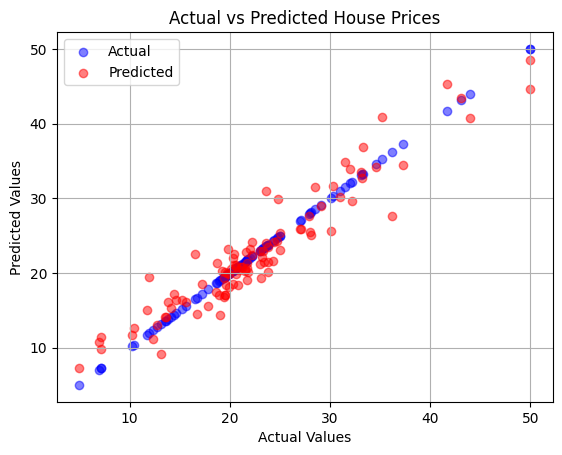

In [186]:
import matplotlib.pyplot as plt

# Plotting actual values
plt.scatter(Y_test, Y_test, color='blue', label='Actual', alpha=0.5)

# Plotting predicted values
plt.scatter(Y_test, final_predictions, color='red', label='Predicted', alpha=0.5)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.grid(True)
plt.show()


## Using the model

In [187]:
from joblib import load

# Load the saved model
model = load('best_model.joblib')  # Replace 'best_model.joblib' with the path to your saved model file


In [188]:
import numpy as np

# Define the features for prediction
features = np.array([[-55.43942006, 47.12628155, -1.6165014, -1.67288841, -1.42262747,
                      -1.44443979304, -49.31238772, 73.61111401, -926.0016879, -0.5778192,
                      -7.97491834, 0.41164221, -6.86091034]])


In [189]:
# Make predictions using the loaded model
predictions = model.predict(features)


In [190]:
# Print the predictions
print("Predicted house prices:", predictions)


Predicted house prices: [22.66031892]


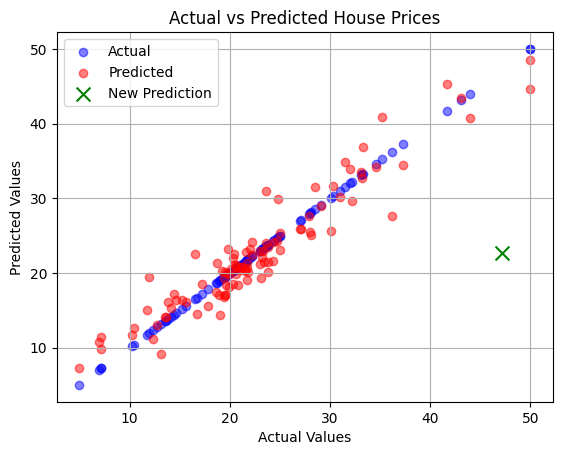

In [192]:
# Selecting a feature for plotting against predicted values
selected_feature_index = 1  # Choose the index of the feature you want to use for plotting
selected_feature_values = features[:, selected_feature_index]

# Plotting actual and predicted values
plt.scatter(Y_test, Y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(Y_test, final_predictions, color='red', label='Predicted', alpha=0.5)
plt.scatter(selected_feature_values, predictions, color='green', label='New Prediction', marker='x', s=100)  # Plot the new prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.grid(True)
plt.show()
